# The Area-Mach Number relation

Dr. Daniel Duke<br>
Laboratory for Turbulence Research in Aerospace & Combustion (LTRAC)<br>
Department of Mechanical & Aerospace Engineering<br>
Monash University, Australia

The function takes the following form:

$$
    \begin{align}
    \left( \frac{A}{A^*}\right)^2 = \frac{1}{M^2}\left[ \frac{2}{\gamma+1} \left( 1 + \frac{\gamma-1}{2}M^2 \right) \right]^{\frac{\gamma+1}{\gamma-1}}
    \end{align}
$$

where:
$$
\begin{align}
A &=& \text{duct area at some streamwise position}\\
A^* &=& \text{throat area}\\
M &=& \text{Mach number at some streamwise position}\\
\gamma &=& \text{ratio of specific heats}
\end{align}
$$

Let's explore this relationship, assuming the nozzle is ideally expanded and the flow is therefore isentropic throughout.

In [1]:
# Import python libraries
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib
import scipy.optimize as sopt
%matplotlib notebook

In [2]:
# Set some constants
gamma = 1.4 # air

In [3]:
# Define functions to solve

# Static to stagnation pressure ratio
def p0_p_ratio(M,gamma=1.4):
    return (1+(gamma-1)*0.5*M**2)**(gamma/(gamma-1.))

# Static to stagnation temperature ratio
def T0_T_ratio(M,gamma=1.4):
    return 1 + (gamma-1)*0.5*M**2

# Area-Mach Number relation as above
def A_Astar(M,gamma=1.4):
    return ((M**-2.)*((2./(gamma+1.))*(1+(gamma-1)*0.5*M**2))**((gamma+1)/(gamma-1.)))**0.5

In [4]:
# Calculate profile and properties for a given back pressure
def design_nozzle(p0_pb):

    # Find ideally expanded exit Mach number given p0 and pb
    Me = sopt.fsolve(lambda M, p0_p, gamma: p0_p_ratio(M,gamma) - p0_p , x0=10., args=(p0_pb, gamma))
    
    # Define a linear ramp of M from 0 to Me
    M = np.linspace(1./p0_pb,Me,100)
    M = M.reshape(len(M),)
    
    # Define a 'position' relative to the throat, ie where M=1.
    x=(M-1)/(Me-1)
    
    # Solve Area-Mach relation for this profile
    AA = A_Astar(M, gamma)
    
    # Solve radius assuming axisymmetric profile
    R = (AA)**0.5
    
    # Solve p0_p for this profile
    pp = p0_p_ratio(M, gamma)
    
    # Solve T0_T for this profile
    TT = T0_T_ratio(M, gamma)
    
    # Solve rho0_rho for this profile using ideal gas
    r0rho = pp / TT
    
    # Make plot title
    title = "$p_0/p_b$ = %.2f, $A_e/A^*$ = %.2f, $M_e$ = %.2f" % (p0_pb,AA[-1],Me)
    
    return x, R, 1./pp, 1./TT, 1./r0rho, title

<IPython.core.display.Javascript object>


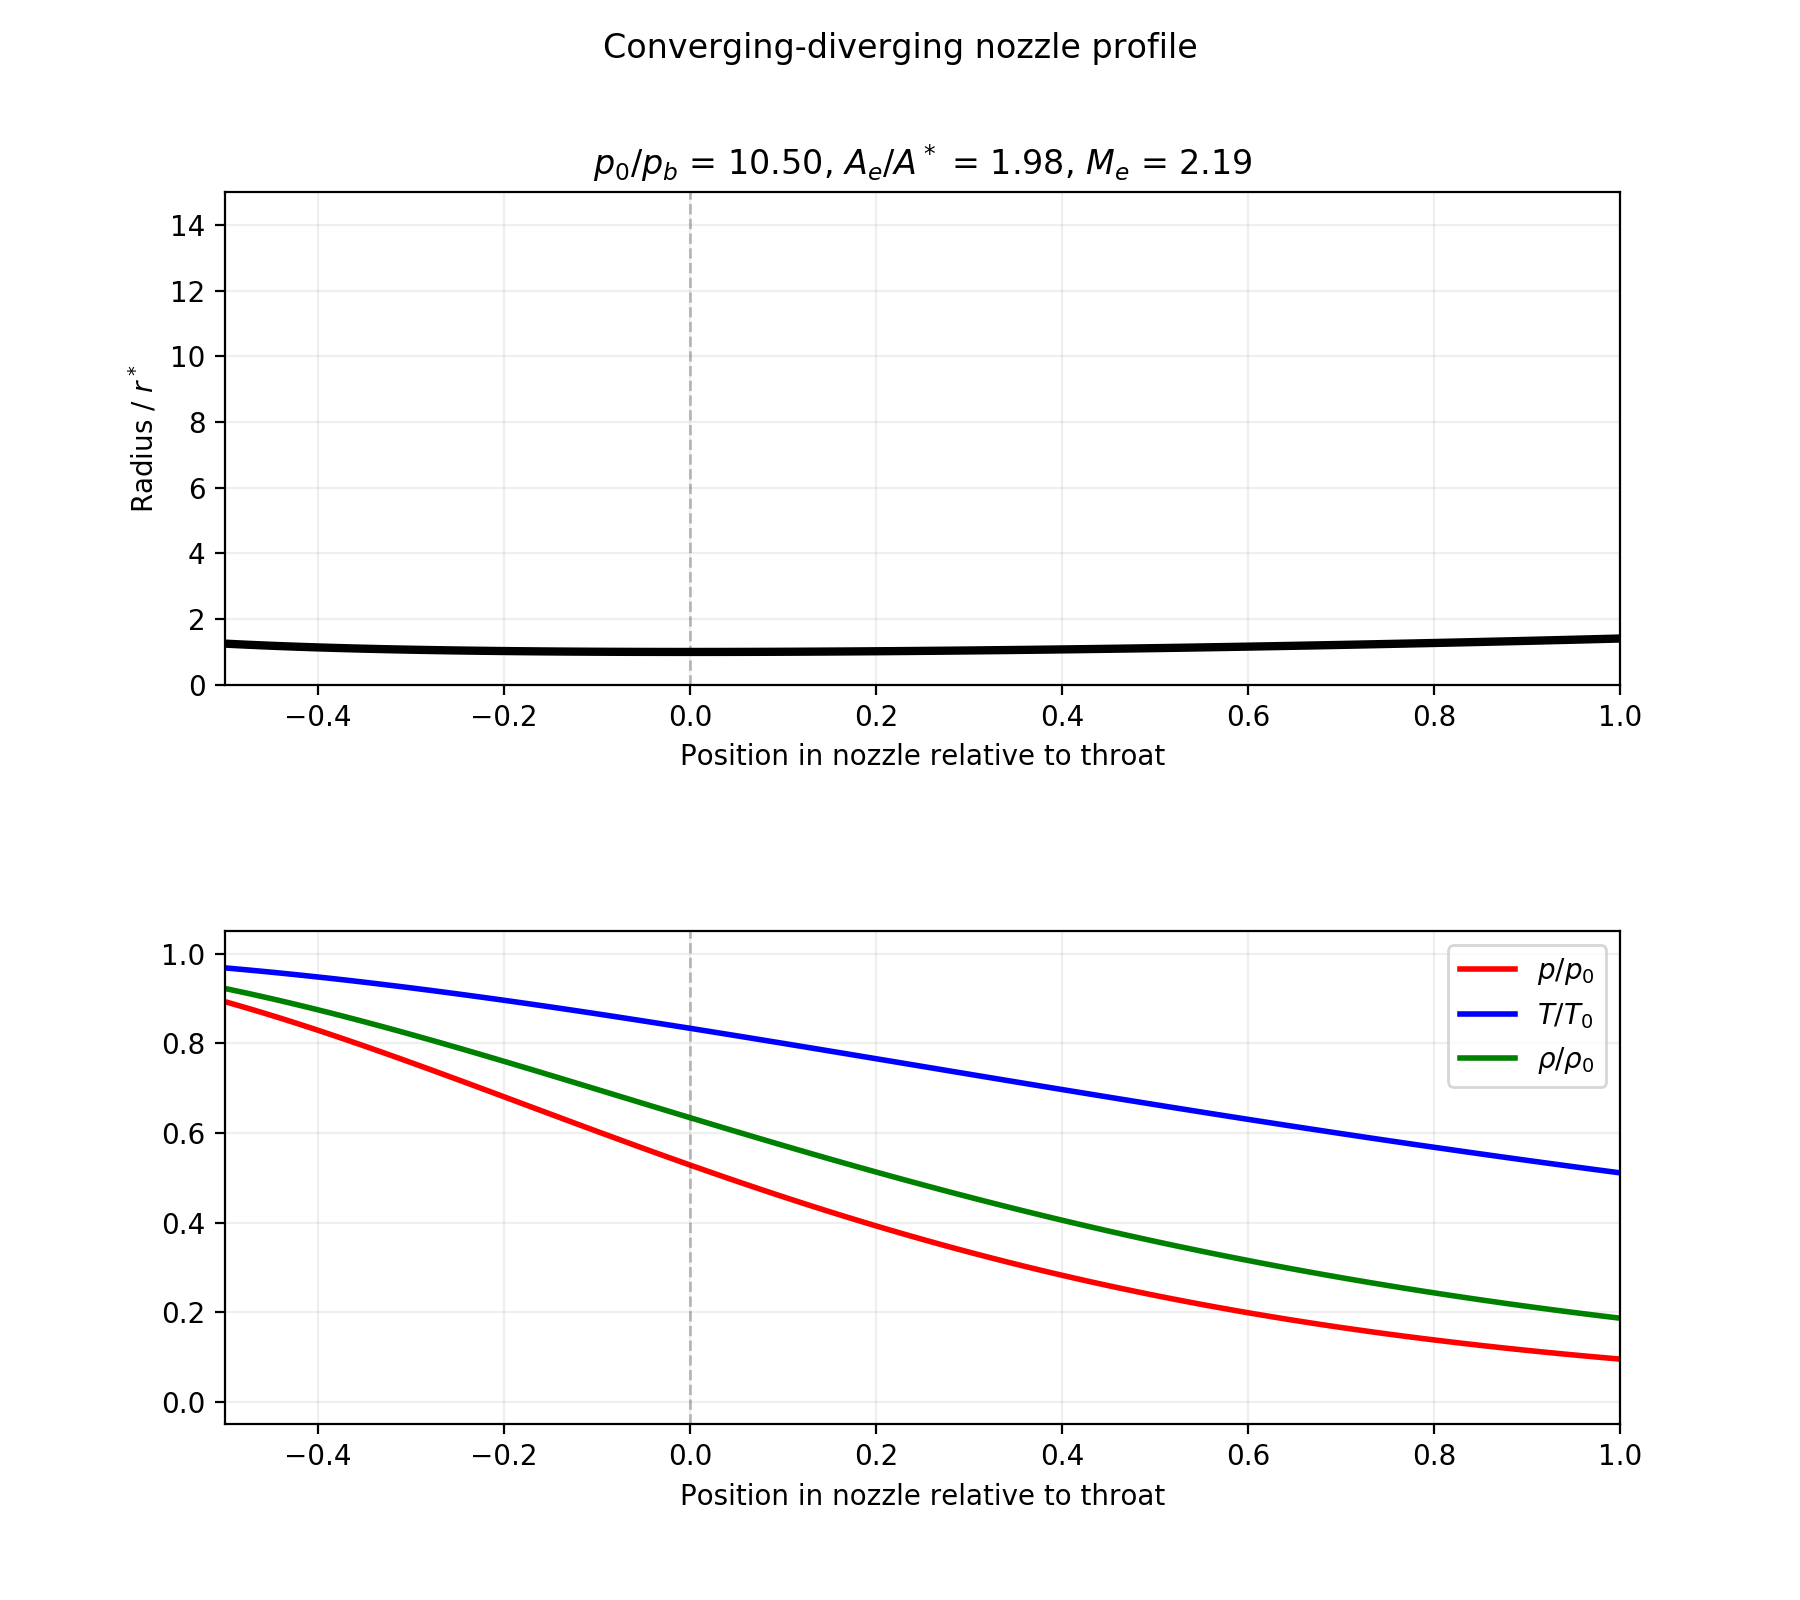

interactive(children=(FloatLogSlider(value=2500.0, description='p0_pb', max=4.079181246047625, min=0.301029995…

In [6]:
# Set some variables
p0_pb_ratio = widgets.FloatLogSlider(min=np.log10(2),max=np.log10(12000),step=0.01,value=2500.)

# Run first calc
x,y,y2,y3,y4,title = design_nozzle(p0_pb_ratio.value)

# Generate interactive plots
ymax=15.
xmin=-.5

fig=plt.figure(figsize=(9,8))

ax1=fig.add_subplot(211)
plt.grid(alpha=.2)
plt.xlabel("Position in nozzle relative to throat")
plt.ylabel("Radius / $r^*$")
plt.suptitle("Converging-diverging nozzle profile")
graph1,=ax1.plot(x,y,lw=3,c='k')
#graph1=ax1.fill_between(x,y,ymax)
plt.title(title)
plt.xlim(xmin,1)
plt.ylim(0,ymax)
plt.axvline(0,ls='--',lw=1,c='k',alpha=.25)

ax2=fig.add_subplot(212)
plt.grid(alpha=.2)
plt.xlabel("Position in nozzle relative to throat")
#plt.title(title)
graph2,=ax2.plot(x,y2,lw=2,c='r',label='$p/p_0$')
graph3,=ax2.plot(x,y3,lw=2,c='b',label='$T/T_0$')
graph4,=ax2.plot(x,y4,lw=2,c='g',label='$\\rho/\\rho_0$')
plt.xlim(xmin,1)
plt.legend()
plt.axvline(0,ls='--',lw=1,c='k',alpha=.25)
#plt.ylim(0,1)

plt.subplots_adjust(hspace=.5)

def update_graphs(p0_pb):
    x,y,y2,y3,y4,title = design_nozzle(p0_pb)
    graph1.set_xdata(x)
    graph1.set_ydata(y)
    graph2.set_xdata(x)
    graph2.set_ydata(y2)
    graph3.set_xdata(x)
    graph3.set_ydata(y3)
    graph4.set_xdata(x)
    graph4.set_ydata(y4)
    ax1.set_title(title)
    fig.canvas.draw_idle()
    return

interact(update_graphs, p0_pb=p0_pb_ratio);